<a href="https://colab.research.google.com/github/dvillanueva123/Cd-202202_Darinel_Villanueva/blob/main/Taller3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pyproj

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.3 MB 5.2 MB/s 


In [2]:
import pandas as pd

In [58]:
ruta = 'https://foscalinternacional.com/datasets/eventos_dengue_2020.csv'
df = pd.read_csv(ruta)

In [4]:
df

,ID,fec_not,semana,año,edad_,uni_med_,sexo_,cod_pais_o,cod_dpto_o,cod_mun_o,...,hipotension,hepatomegalia,hemorragia_mucosa,hipotermia,caida_plaquetas,acum_liquido,aum_hematocrito,conducta,latitud,longitud
0,1,17/01/2020,1,2020,25,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.076011,-73.102501
1,2,10/01/2020,1,2020,24,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.079495,-73.105400
2,3,12/01/2020,1,2020,58,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.090290,-73.091003
3,4,12/01/2020,1,2020,29,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.067435,-73.090958
4,5,10/01/2020,1,2020,56,1,F,170,68,276,...,2,2,2,2,1,2,2,2. Hospitalizacion piso,7.066905,-73.104980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,1258,7/03/2020,9,2020,36,1,F,170,68,276,...,2,2,1,2,2,2,2,1. Ambulatorio,7.072610,-73.099487
1258,1259,13/03/2020,9,2020,42,1,M,170,68,276,...,2,2,2,2,1,2,1,2. Hospitalizacion piso,7.065252,-73.103607
1259,1260,8/03/2020,9,2020,2,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.091391,-73.103264
1260,1261,11/03/2020,9,2020,12,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.061083,-73.097000


In [5]:
#df = df.dropna()
#df

In [6]:
df.dtypes

ID                     int64
fec_not               object
semana                 int64
año                    int64
edad_                  int64
uni_med_               int64
sexo_                 object
cod_pais_o             int64
cod_dpto_o             int64
cod_mun_o              int64
area_                  int64
ocupacion_             int64
tip_ss_               object
cod_ase_              object
gp_discapa             int64
gp_desplaz             int64
gp_migrant             int64
gp_carcela             int64
gp_gestan              int64
gp_calle               int64
gp_psiquia             int64
gp_vic_vio             int64
fecha_contagio        object
inicio_sintomas       object
pac_hos_               int64
fec_hos_              object
condicion_final        int64
fecha_defuncion      float64
fecha_nacimiento      object
certif_defuncion     float64
familiar_sintomas      int64
fiebre                 int64
cefalea                int64
dolor_retroocular      int64
mialgias      

In [7]:
#Se formatean los datos de fecha
from datetime import datetime

df['fec_not2'] = pd.to_datetime(df['fec_not'], format="%d/%m/%Y")
df['fecha_contagio2'] = pd.to_datetime(df['fecha_contagio'], format="%d/%m/%Y")
df['inicio_sintomas2'] = pd.to_datetime(df['inicio_sintomas'], format="%d/%m/%Y")
df['fec_hos_2'] = pd.to_datetime(df['fec_hos_'], format="%d/%m/%Y")

In [8]:
#Creación de la proyección
import pyproj

P = pyproj.Proj(proj='utm', zone=18, ellps='WGS84', preserve_units=True)

In [9]:
#Se convertirán las coordenadas geográficas a UTM
df['x'], df['y'] = P(df['longitud'], df['latitud'])
df

,ID,fec_not,semana,año,edad_,uni_med_,sexo_,cod_pais_o,cod_dpto_o,cod_mun_o,...,aum_hematocrito,conducta,latitud,longitud,fec_not2,fecha_contagio2,inicio_sintomas2,fec_hos_2,x,y
0,1,17/01/2020,1,2020,25,1,F,170,68,276,...,2,1. Ambulatorio,7.076011,-73.102501,2020-01-17,2020-01-17,2020-01-10,NaT,709584.027559,782579.281866
1,2,10/01/2020,1,2020,24,1,M,170,68,276,...,2,1. Ambulatorio,7.079495,-73.105400,2020-01-10,2020-01-10,2020-01-07,NaT,709262.121378,782963.354103
2,3,12/01/2020,1,2020,58,1,M,170,68,276,...,2,1. Ambulatorio,7.090290,-73.091003,2020-01-12,2020-01-12,2020-01-08,NaT,710847.924654,784163.825097
3,4,12/01/2020,1,2020,29,1,F,170,68,276,...,2,1. Ambulatorio,7.067435,-73.090958,2020-01-12,2020-01-10,2020-01-06,NaT,710863.366771,781635.895608
4,5,10/01/2020,1,2020,56,1,F,170,68,276,...,2,2. Hospitalizacion piso,7.066905,-73.104980,2020-01-10,2020-01-10,2020-01-07,2020-01-10,709314.159319,781570.969374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,1258,7/03/2020,9,2020,36,1,F,170,68,276,...,2,1. Ambulatorio,7.072610,-73.099487,2020-03-07,2020-03-06,2020-03-03,NaT,709918.546763,782204.438977
1258,1259,13/03/2020,9,2020,42,1,M,170,68,276,...,1,2. Hospitalizacion piso,7.065252,-73.103607,2020-03-13,2020-03-13,2020-03-06,2020-03-13,709466.644754,781388.734012
1259,1260,8/03/2020,9,2020,2,1,M,170,68,276,...,2,1. Ambulatorio,7.091391,-73.103264,2020-03-08,2020-03-08,2020-03-04,NaT,709492.782783,784279.996264
1260,1261,11/03/2020,9,2020,12,1,F,170,68,276,...,2,1. Ambulatorio,7.061083,-73.097000,2020-03-11,2020-03-11,2020-03-05,NaT,710198.574916,780930.648555


In [10]:
#Punto de alcaldia
lat_alcaldia=7.06
lon_alcaldia=-73.08

x_alcaldia, y_alcaldia = P(lon_alcaldia, lat_alcaldia)
x_alcaldia, y_alcaldia

(712077.5246709115, 780818.532284854)

In [11]:
#Se agrega la nueva columna
import numpy as np

df['distancia_alcaldia'] = np.sqrt((df['x']-x_alcaldia)**2+(df['y']-y_alcaldia)**2)

In [12]:
df

,ID,fec_not,semana,año,edad_,uni_med_,sexo_,cod_pais_o,cod_dpto_o,cod_mun_o,...,conducta,latitud,longitud,fec_not2,fecha_contagio2,inicio_sintomas2,fec_hos_2,x,y,distancia_alcaldia
0,1,17/01/2020,1,2020,25,1,F,170,68,276,...,1. Ambulatorio,7.076011,-73.102501,2020-01-17,2020-01-17,2020-01-10,NaT,709584.027559,782579.281866,3052.501751
1,2,10/01/2020,1,2020,24,1,M,170,68,276,...,1. Ambulatorio,7.079495,-73.105400,2020-01-10,2020-01-10,2020-01-07,NaT,709262.121378,782963.354103,3539.315800
2,3,12/01/2020,1,2020,58,1,M,170,68,276,...,1. Ambulatorio,7.090290,-73.091003,2020-01-12,2020-01-12,2020-01-08,NaT,710847.924654,784163.825097,3564.112821
3,4,12/01/2020,1,2020,29,1,F,170,68,276,...,1. Ambulatorio,7.067435,-73.090958,2020-01-12,2020-01-10,2020-01-06,NaT,710863.366771,781635.895608,1463.646887
4,5,10/01/2020,1,2020,56,1,F,170,68,276,...,2. Hospitalizacion piso,7.066905,-73.104980,2020-01-10,2020-01-10,2020-01-07,2020-01-10,709314.159319,781570.969374,2863.974448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,1258,7/03/2020,9,2020,36,1,F,170,68,276,...,1. Ambulatorio,7.072610,-73.099487,2020-03-07,2020-03-06,2020-03-03,NaT,709918.546763,782204.438977,2565.525866
1258,1259,13/03/2020,9,2020,42,1,M,170,68,276,...,2. Hospitalizacion piso,7.065252,-73.103607,2020-03-13,2020-03-13,2020-03-06,2020-03-13,709466.644754,781388.734012,2672.419119
1259,1260,8/03/2020,9,2020,2,1,M,170,68,276,...,1. Ambulatorio,7.091391,-73.103264,2020-03-08,2020-03-08,2020-03-04,NaT,709492.782783,784279.996264,4320.025868
1260,1261,11/03/2020,9,2020,12,1,F,170,68,276,...,1. Ambulatorio,7.061083,-73.097000,2020-03-11,2020-03-11,2020-03-05,NaT,710198.574916,780930.648555,1882.291752


In [13]:
datosf = df
datosf = datosf.select_dtypes(exclude=['object', 'datetime64'])
datosf = datosf.drop('año', axis = 1)
datosf = datosf.drop('cod_pais_o', axis = 1)
datosf = datosf.drop('condicion_final', axis = 1)
datosf = datosf.drop('fecha_defuncion', axis = 1)
datosf = datosf.drop('certif_defuncion', axis = 1)

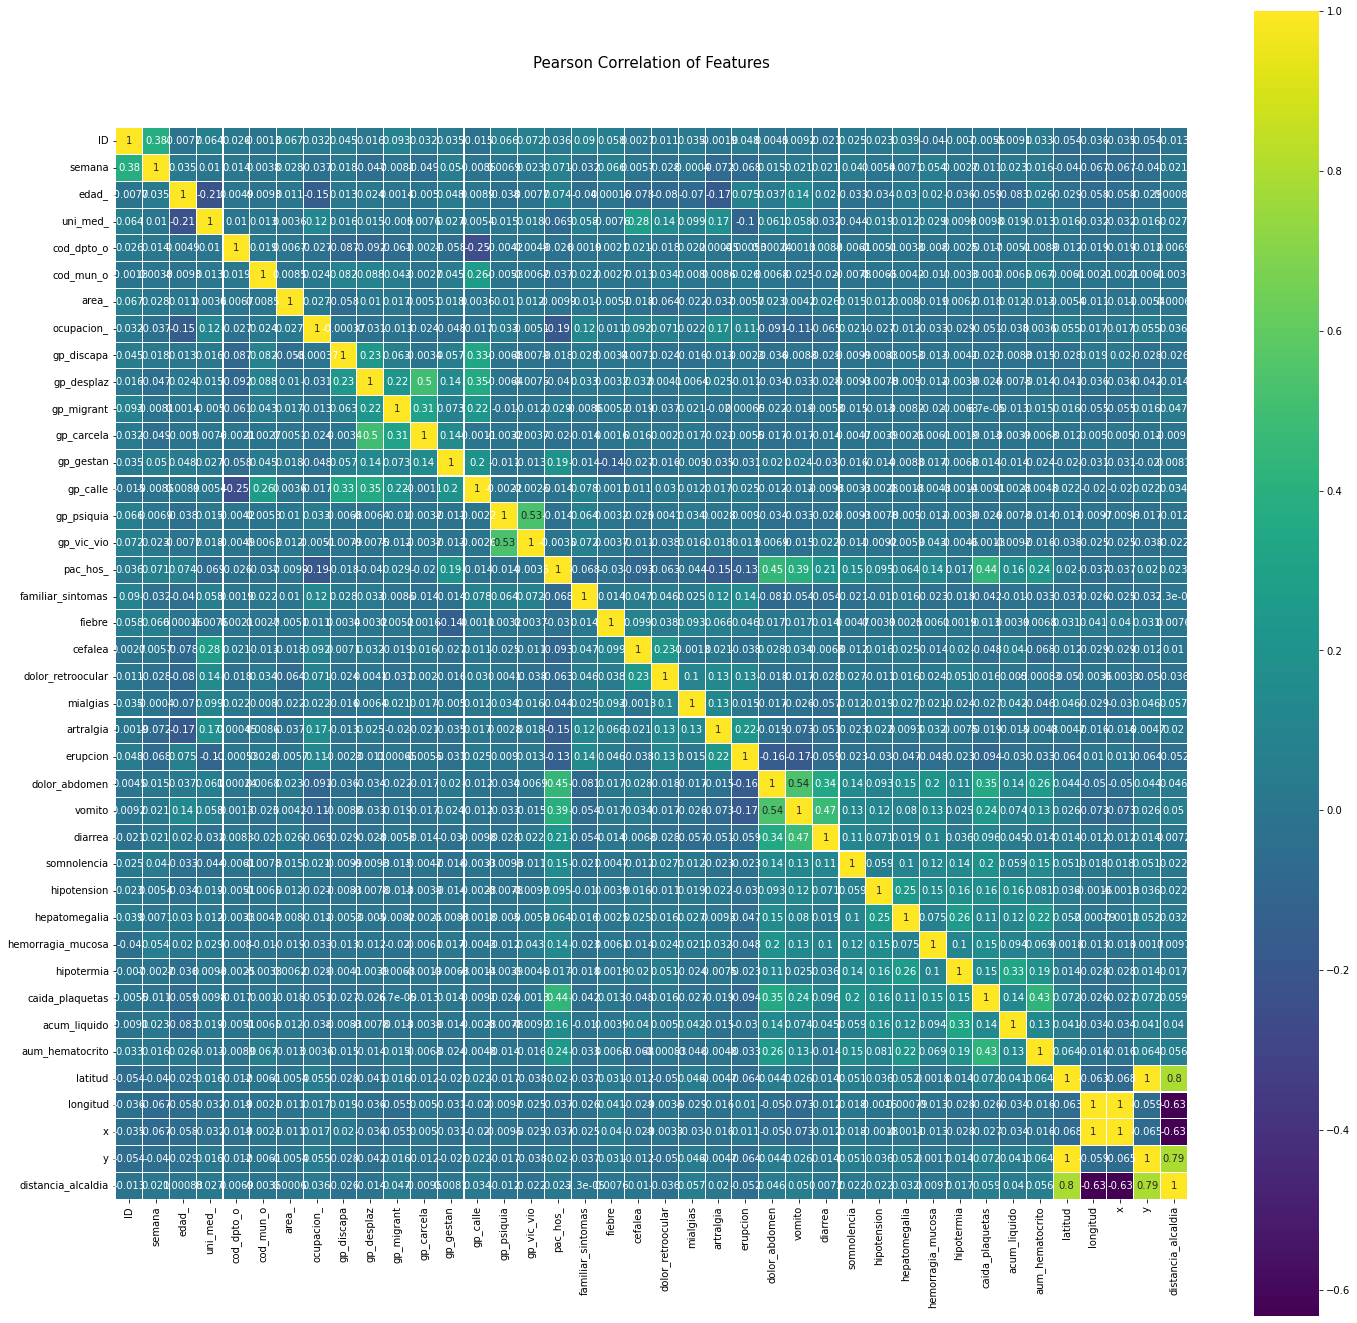

In [14]:
import matplotlib.pyplot as plt
import seaborn as sb

colormap = plt.cm.viridis
plt.figure(figsize=(24,24))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sb.heatmap(datosf.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [15]:
#KDE
bw = 150
res = 10
kernel = 4 #1. Uniforme - 2. Triangular - 3. Gaussiana - 4. Epanechnikov - 5. Varianza mínima

#Bordes
xMin = df['x'].min() - bw
xMax = df['x'].max() + bw
yMin = df['y'].min() - bw
yMax = df['y'].max() + bw
xMin, xMax, yMin, yMax

(707838.5715792507, 712513.8865034583, 780351.6340403266, 785201.1759298786)

In [16]:
import math

#Dimensiones de la matriz
numFilas = math.ceil((yMax - yMin) / res)
numCols = math.ceil((xMax - xMin) / res)
numFilas, numCols

(485, 468)

In [17]:
#Número de casos por pixel
matCasos = np.zeros((numFilas, numCols), dtype=float)
for i in range(len(df)):
  fila = math.floor((df['y'][i] - yMin) / res)
  columna = math.floor((df['x'][i] - xMin) / res)
  matCasos[fila][columna] += 1

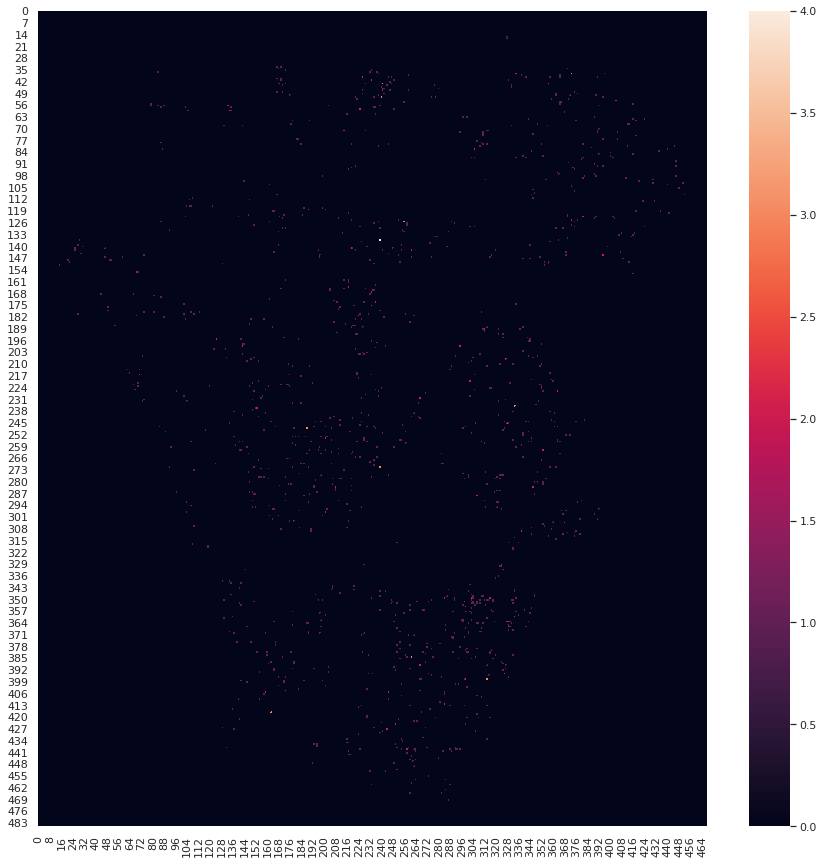

In [18]:
#Visualización de puntos
import seaborn as sns
sns.set(rc = {'figure.figsize':(15,15)})
p = sns.heatmap(matCasos)

In [19]:
#Función de Kernel
def funcionKernel(dist):
  resul = 0
  if dist <= bw:
    if kernel == 1: #Uniforme
      resul = 0.5
    elif kernel == 2: #Triangular
      resul = 1 - math.abs(dist / bw)
    elif kernel == 3: #Gaussiana
      resul = (math.e**(-(dist / bw)**2 / 2)) / math.sqrt(2 * math.pi)
    elif kernel == 4: #Epanechnikov
      resul = (3 / 4) * (1 - (dist / bw)**2)
    elif kernel == 5:
      resul = (3 / 8) * (3 - 5 * (dist / bw)**2)

  return resul

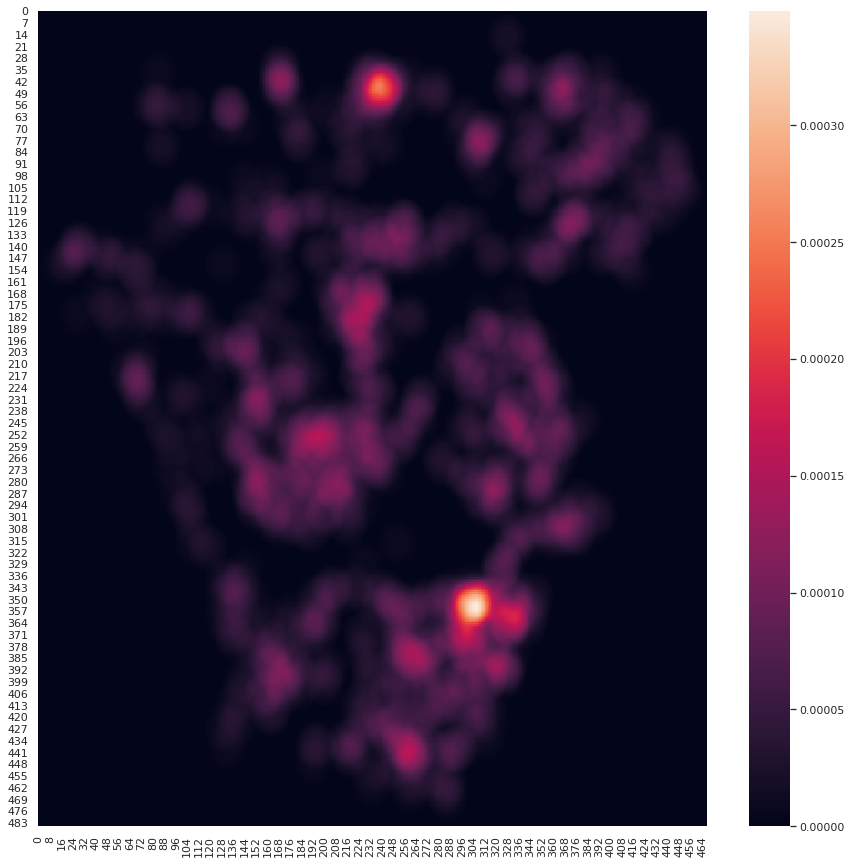

In [20]:
#Cálculo de densidad
delta = bw // res
matDensidad = np.zeros((numFilas, numCols), dtype=float)
for i in range(numFilas):
  for j in range(numCols):
    if matCasos[i][j] > 0:
      for k in range(max(i - delta, 0), min(i + delta, numFilas)):
        for l in range(max(j - delta, 0), min(j + delta, numCols)):
          dist = ((i - k)**2 + (j - l)**2)**0.5 * res
          if dist <= bw:
            matDensidad[k][l] += matCasos[i][j] * funcionKernel(dist) / (math.pi * bw**2)

#Visualización de densidades
sns.set(rc = {'figure.figsize':(15,15)})
p = sns.heatmap(matDensidad)

In [21]:
!pip install cython
!pip install cartopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.8 MB 5.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 36.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 37.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 38.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 12.1 MB 46.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████

In [22]:
!apt-get -qq install python-cartopy python3-cartopy
!pip uninstall -y shapely    # cartopy and shapely aren't friends (early 2020)
!pip install shapely --no-binary shapely

Selecting previously unselected package python-pkg-resources.
(Reading database ... 155685 files and directories currently installed.)
Preparing to unpack .../00-python-pkg-resources_39.0.1-2_all.deb ...
Unpacking python-pkg-resources (39.0.1-2) ...
Selecting previously unselected package python-pyshp.
Preparing to unpack .../01-python-pyshp_1.2.12+ds-1_all.deb ...
Unpacking python-pyshp (1.2.12+ds-1) ...
Selecting previously unselected package python-shapely.
Preparing to unpack .../02-python-shapely_1.6.4-1_amd64.deb ...
Unpacking python-shapely (1.6.4-1) ...
Selecting previously unselected package python-six.
Preparing to unpack .../03-python-six_1.11.0-2_all.deb ...
Unpacking python-six (1.11.0-2) ...
Selecting previously unselected package python-cartopy:amd64.
Preparing to unpack .../04-python-cartopy_0.14.2+dfsg1-2build3_amd64.deb ...
Unpacking python-cartopy:amd64 (0.14.2+dfsg1-2build3) ...
Selecting previously unselected package python3-numpy.
Preparing to unpack .../05-python

In [23]:
import warnings
warnings.filterwarnings('ignore')

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm

import numpy as np

import cartopy
import cartopy.crs as ccrs                   # for projections
import cartopy.feature as cfeature           # for features
import cartopy.io.shapereader as shapereader
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.feature.nightshade import Nightshade

In [25]:
# Obtain the remote shapefile files
import urllib.request

url = 'https://foscalinternacional.com/cartografia/'

file_list = ["68276_manzanas.cpg", "68276_manzanas.dbf", "68276_manzanas.prj", "68276_manzanas.qpj", "68276_manzanas.shp", "68276_manzanas.shx"]

for file in file_list:
    urllib.request.urlretrieve(url+file, file)

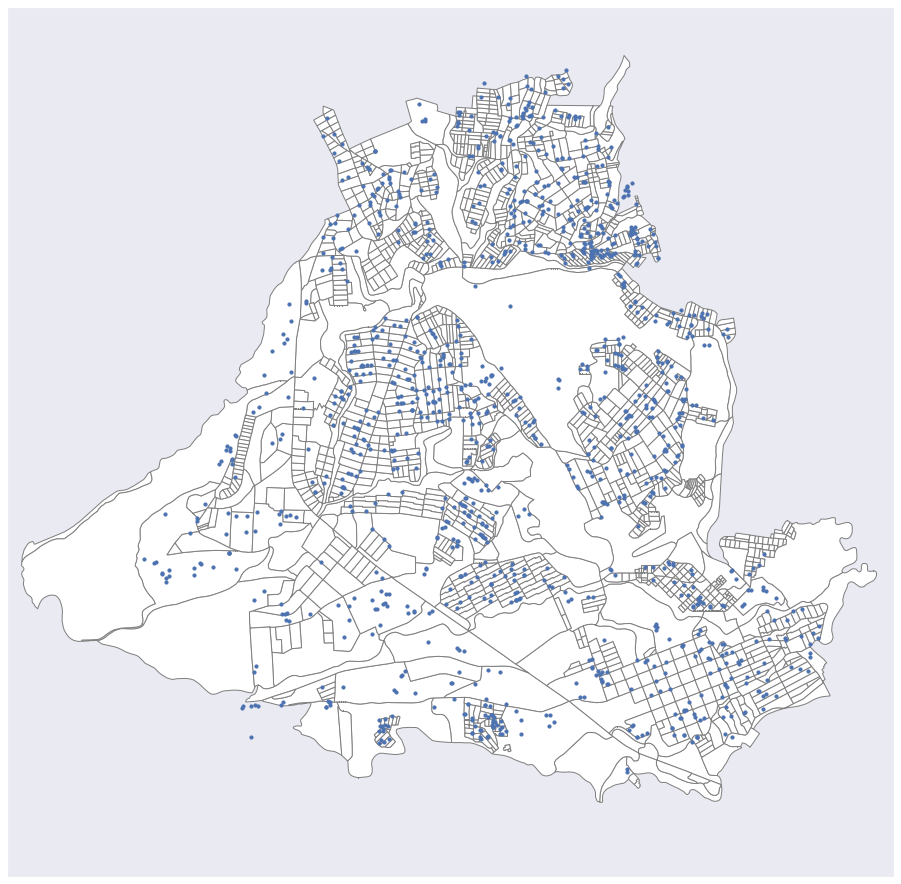

In [26]:
subplot_kw = dict(projection=ccrs.PlateCarree())

fig, ax = plt.subplots(figsize=(16, 16), subplot_kw=subplot_kw)

# Mapa de floridablanca
lower_lon = -73.125
upper_lon = -73.073
lower_lat = 7.051
upper_lat = 7.102

ax.set_extent([lower_lon, upper_lon, lower_lat, upper_lat])

reader = shapereader.Reader('68276_manzanas')

for manzana in reader.geometries():
    ax.add_geometries([manzana], ccrs.PlateCarree(), facecolor='white', edgecolor='gray')

ax.scatter(df['longitud'], df['latitud'], zorder=10, c='b', s=10)

ax.add_line
plt.show()

In [27]:
#Generador de gamas de colores
import colorsys

def generar_gama(ri, gi, bi, rf, gf, bf, alfa, cantidad):
  hsvi = colorsys.rgb_to_hsv(ri / 255, gi / 255, bi / 255)
  hsvf = colorsys.rgb_to_hsv(rf / 255, gf / 255, bf / 255)

  pasoh = (hsvf[0] - hsvi[0]) / (cantidad - 1)
  pasos = (hsvf[1] - hsvi[1]) / (cantidad - 1)
  pasov = (hsvf[2] - hsvi[2]) / (cantidad - 1)

  listaRGB = []
  listaRGB.append((ri, gi, bi, alfa))
  for i in range(cantidad - 1):
    h = hsvi[0] + pasoh * (i + 1)
    s = hsvi[1] + pasos * (i + 1)
    v = hsvi[2] + pasov * (i + 1)

    rgb = colorsys.hsv_to_rgb(h, s, v)
    listaRGB.append((int(rgb[0]*255), int(rgb[1]*255), int(rgb[2]*255), alfa))

  return listaRGB

listaColores = generar_gama(255, 255, 0, 255, 0, 0, 30, 10)
listaColores

[(255, 255, 0, 30),
 (255, 226, 0, 30),
 (255, 198, 0, 30),
 (255, 170, 0, 30),
 (255, 141, 0, 30),
 (255, 113, 0, 30),
 (255, 84, 0, 30),
 (255, 56, 0, 30),
 (255, 28, 0, 30),
 (255, 0, 0, 30)]

In [28]:
def matrizAListaSinCeros(matriz):
  listaValores = []
  for fila in matriz:
    for valor in fila:
      if valor != 0:
        listaValores.append(valor)
  
  return listaValores

def obtenerDeciles(matriz):
  listaValores = matrizAListaSinCeros(matriz)
  
  return np.quantile(listaValores, q = np.arange(0.1, 1, 0.1))

def obtenerDivisiones(matriz, numDivisiones):
  listaValores = matrizAListaSinCeros(matriz)
  minimo, maximo = min(listaValores), max(listaValores)

  listaDivisiones = []
  for i in range(numDivisiones):
    listaDivisiones.append(minimo + (maximo - minimo) * (i + 1) / numDivisiones)
  
  return listaDivisiones

def hallarDivision(valor, listaDivisiones):
  division = 0
  for valDiv in listaDivisiones:
    if valor <= valDiv:
      return division
    division += 1
  return division

In [29]:
#listaDivisiones = obtenerDeciles(matDensidad)
listaDivisiones = obtenerDivisiones(matDensidad, 10)
listaDivisiones

[3.506124450039236e-05,
 6.993386092008321e-05,
 0.00010480647733977407,
 0.0001396790937594649,
 0.00017455171017915575,
 0.00020942432659884662,
 0.00024429694301853746,
 0.00027916955943822834,
 0.00031404217585791916,
 0.00034891479227761003]

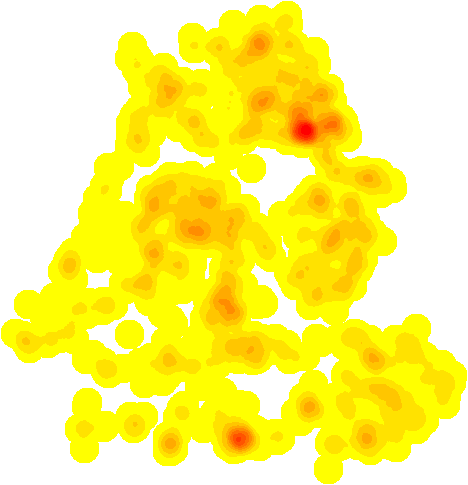

In [30]:
#Creación del mapa de calor como imagen
from PIL import Image

img = Image.new('RGB', (numCols, numFilas))
for i in range(numFilas):
  for j in range(numCols):
    if matDensidad[i][j] != 0:
      division = hallarDivision(matDensidad[i][j], listaDivisiones)
      img.putpixel((j, numFilas - i - 1), listaColores[division])
    else:
      img.putpixel((j, numFilas - i - 1), (255, 255, 255, 0))

#img.save('heatmap.png')
img

In [31]:
#Se hallan las coordenadas geográficas de los bordes
lonMin, latMin = P(xMin, yMin, inverse=True)
lonMax, latMax = P(xMax, yMax, inverse=True)

latMin, lonMin, latMax, lonMax

(7.055935086822216, -73.11837930307702, 7.099606334920535, -73.07588677764645)

In [37]:
df.dtypes

ID                             int64
fec_not                       object
semana                         int64
año                            int64
edad_                          int64
uni_med_                       int64
sexo_                         object
cod_pais_o                     int64
cod_dpto_o                     int64
cod_mun_o                      int64
area_                          int64
ocupacion_                     int64
tip_ss_                       object
cod_ase_                      object
gp_discapa                     int64
gp_desplaz                     int64
gp_migrant                     int64
gp_carcela                     int64
gp_gestan                      int64
gp_calle                       int64
gp_psiquia                     int64
gp_vic_vio                     int64
fecha_contagio                object
inicio_sintomas               object
pac_hos_                       int64
fec_hos_                      object
condicion_final                int64
f

In [47]:
df2=df


In [48]:
df2

,ID,semana,año,edad_,uni_med_,cod_pais_o,cod_dpto_o,cod_mun_o,area_,ocupacion_,...,aum_hematocrito,latitud,longitud,fec_not2,fecha_contagio2,inicio_sintomas2,fec_hos_2,x,y,distancia_alcaldia
0,1,1,2020,25,1,170,68,276,1,2411,...,2,7.076011,-73.102501,2020-01-17,2020-01-17,2020-01-10,NaT,709584.027559,782579.281866,3052.501751
1,2,1,2020,24,1,170,68,276,1,9997,...,2,7.079495,-73.105400,2020-01-10,2020-01-10,2020-01-07,NaT,709262.121378,782963.354103,3539.315800
2,3,1,2020,58,1,170,68,276,1,9999,...,2,7.090290,-73.091003,2020-01-12,2020-01-12,2020-01-08,NaT,710847.924654,784163.825097,3564.112821
3,4,1,2020,29,1,170,68,276,1,4121,...,2,7.067435,-73.090958,2020-01-12,2020-01-10,2020-01-06,NaT,710863.366771,781635.895608,1463.646887
4,5,1,2020,56,1,170,68,276,1,9210,...,2,7.066905,-73.104980,2020-01-10,2020-01-10,2020-01-07,2020-01-10,709314.159319,781570.969374,2863.974448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,1258,9,2020,36,1,170,68,276,1,9996,...,2,7.072610,-73.099487,2020-03-07,2020-03-06,2020-03-03,NaT,709918.546763,782204.438977,2565.525866
1258,1259,9,2020,42,1,170,68,276,1,2145,...,1,7.065252,-73.103607,2020-03-13,2020-03-13,2020-03-06,2020-03-13,709466.644754,781388.734012,2672.419119
1259,1260,9,2020,2,1,170,68,276,1,9998,...,2,7.091391,-73.103264,2020-03-08,2020-03-08,2020-03-04,NaT,709492.782783,784279.996264,4320.025868
1260,1261,9,2020,12,1,170,68,276,1,9997,...,2,7.061083,-73.097000,2020-03-11,2020-03-11,2020-03-05,NaT,710198.574916,780930.648555,1882.291752


In [65]:
df2=df

In [69]:
df2 = df.select_dtypes(exclude=['datetime64'])
rm = ['ID', 'fec_not', 'año', 'uni_med_', 'cod_pais_o', 'cod_dpto_o', 
         'cod_mun_o', 'ocupacion_', 'tip_ss_', 'cod_ase_', 'gp_discapa', 
         'gp_migrant','gp_carcela', 'gp_gestan', 'gp_calle', 'gp_psiquia',
         'gp_vic_vio', 'fecha_contagio', 'inicio_sintomas', 'condicion_final', 'fecha_nacimiento', 'fecha_defuncion', 
         'certif_defuncion', 'fec_hos_', 'conducta','sexo_']
datos = df2.drop(rm, axis=1)
datos.dtypes

semana                 int64
edad_                  int64
area_                  int64
gp_desplaz             int64
pac_hos_               int64
familiar_sintomas      int64
fiebre                 int64
cefalea                int64
dolor_retroocular      int64
mialgias               int64
artralgia              int64
erupcion               int64
dolor_abdomen          int64
vomito                 int64
diarrea                int64
somnolencia            int64
hipotension            int64
hepatomegalia          int64
hemorragia_mucosa      int64
hipotermia             int64
caida_plaquetas        int64
acum_liquido           int64
aum_hematocrito        int64
latitud              float64
longitud             float64
dtype: object

,ID,fec_not,semana,año,edad_,uni_med_,sexo_,cod_pais_o,cod_dpto_o,cod_mun_o,...,hipotension,hepatomegalia,hemorragia_mucosa,hipotermia,caida_plaquetas,acum_liquido,aum_hematocrito,conducta,latitud,longitud
0,1,17/01/2020,1,2020,25,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.076011,-73.102501
1,2,10/01/2020,1,2020,24,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.079495,-73.105400
2,3,12/01/2020,1,2020,58,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.090290,-73.091003
3,4,12/01/2020,1,2020,29,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.067435,-73.090958
4,5,10/01/2020,1,2020,56,1,F,170,68,276,...,2,2,2,2,1,2,2,2. Hospitalizacion piso,7.066905,-73.104980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,1258,7/03/2020,9,2020,36,1,F,170,68,276,...,2,2,1,2,2,2,2,1. Ambulatorio,7.072610,-73.099487
1258,1259,13/03/2020,9,2020,42,1,M,170,68,276,...,2,2,2,2,1,2,1,2. Hospitalizacion piso,7.065252,-73.103607
1259,1260,8/03/2020,9,2020,2,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.091391,-73.103264
1260,1261,11/03/2020,9,2020,12,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.061083,-73.097000


In [71]:
# Importamos dos módulos para escalado, existen más
# scale: Center to the mean and component wise scale to unit variance
# MinMaxScaler: 
from sklearn.preprocessing import scale, MinMaxScaler

# scale
scaled_1 = scale(datos)

# MinMaxScaler
scaler = MinMaxScaler()
scaled_2 = scaler.fit_transform(datos)

# Muestro las primeras 5 filas escaladas con scale
print("Escalado con scale:")
#print(scaled_1[1:6,])

# Muestro las primeras 5 filas escaladas con Min-Max
print("\nEscalado con Min-Max:")
print(scaled_2[1:6,])


Escalado con scale:

Escalado con Min-Max:
[[0.         0.24468085 0.         1.         1.         1.
  0.         0.         1.         0.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         0.54256478
  0.29221274]
 [0.         0.60638298 0.         1.         1.         0.
  0.         0.         0.         0.         0.         0.
  1.         1.         0.         1.         1.         1.
  1.         1.         1.         1.         1.         0.80490661
  0.65593677]
 [0.         0.29787234 0.         1.         1.         0.
  0.         0.         1.         1.         0.         0.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         0.24945535
  0.65709337]
 [0.         0.58510638 0.         1.         0.         0.
  0.         0.         1.         0.         1.         1.
  1.         0.         0.         1.         1.   

In [73]:
from sklearn.cluster import KMeans

# Por defecto usa la distancia euclidea
km = KMeans(
    n_clusters=3, init='random',
    n_init=10, random_state=0
)

In [74]:
y_km = km.fit_predict(scaled_1)

In [75]:
print(y_km)

[2 2 2 ... 2 2 2]


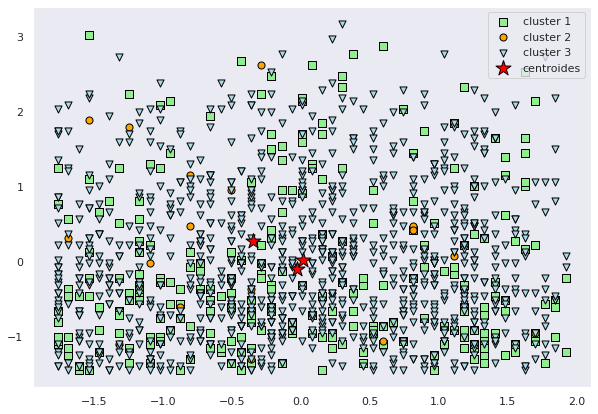

In [76]:
import matplotlib.pyplot as plt

#configuro el tamaño del grafico final
plt.figure(figsize=(10,7))

#scatter del primer cluster
plt.scatter(
    scaled_1[y_km == 0, 0], scaled_1[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)
#scatter del segundo cluster
plt.scatter(
    scaled_1[y_km == 1, 0], scaled_1[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)
#scatter del tercer cluster
plt.scatter(
    scaled_1[y_km == 2, 0], scaled_1[y_km == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)
#scatter del los centroides
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroides'
)
#le pongo la leyenda
plt.legend(scatterpoints=1)
#hace una grilla en el grafico
plt.grid()
#lo imprime en pantalla
plt.show()